## Compare all models in the "models" folder

In [2]:
import setGPU1
import os
from io_functions import *
from draw_functions import *
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Using gpu device 1: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)
Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.
using gpu1


In [3]:
train_datad, test_datad, train_labels, test_labels = train_test(shape=(10000,), split=0.33)
train_datac, test_datac, train_labels, test_labels = train_test(shape=(1, 20, 20, 25), split=0.33)

In [8]:

# Quick way to make and save predictions for future use (won't need in the future)

### CHOOSE WHICH MODEL TO USE ###
label='dense5'
### CHOOSE WHICH MODEL TO USE ###

# Get model and compile
model, history, pred = load_model(label)
model.compile(loss='binary_crossentropy', optimizer='sgd')

# Predict based on whether conv or not
if label[0]=='c':
    predict = model.predict(test_datac)
elif label[0]=='b':
    predict = model.predict([test_datac, test_datac, test_datac])
else:
    predict = model.predict(test_datad)
    
# Save
predict.reshape(predict.shape[0])
pickle.dump( (predict, test_labels), open('models/%s_p.pkl'%label,'w'))


In [9]:
# Load the models' predictions and histories
predictions = {}
histories = {}
for l in filter(None, os.popen('ls models/*.json').read().split('\n')):
    m_name = l.split('/')[-1].split('.')[0]
    
    # Load model information
    model, history, prediction = load_model(m_name)
    if prediction: predictions[m_name] = prediction
    else: print m_name + " needs predictions. Run previous codebox with label='"+m_name+"' to remedy this issue."
    histories[m_name] = history

### Plot all

TypeError: list indices must be integers, not str

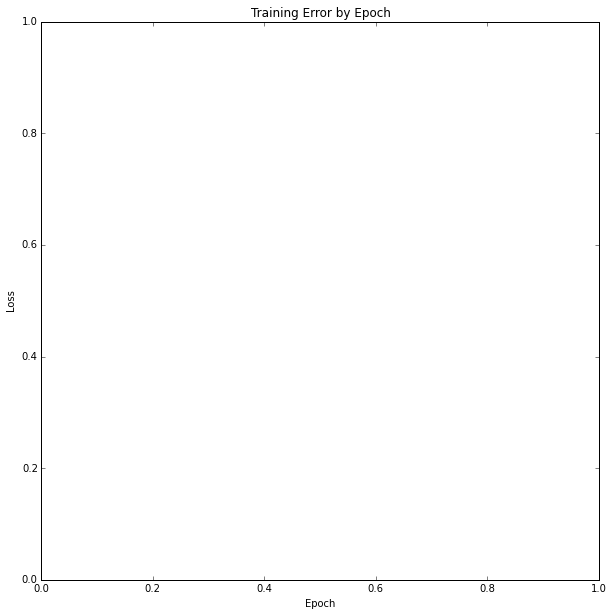

In [7]:
label_list = [k for k,v in sorted(predictions.iteritems())]
draw_list(label_list, predictions, histories)

## Plot Convolutional


In [ ]:
label_list = [k for k,v in sorted(predictions.iteritems()) if 'conv' in k]
draw_list(label_list, predictions, histories)

In [13]:
len(label_list)

5

In [17]:
def my_draw_list(label_list, predictions, histories):
    # Set up the plot
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Error by Epoch')
    plt.ylim(bottom=0)
    
    # Get the colors
    cmap = plt.get_cmap('jet_r')
    N = len(label_list)

    # Draw the histories
    for i, label in enumerate(label_list):
        color = cmap(float(i)/N)
        plt.plot(histories[label]['loss'], label = label + ' loss', linewidth=2, c=color)
        plt.plot(histories[label]['val_loss'], label = label + ' val_loss', linewidth=2, linestyle='dashed', c=color)

    # Put in the legend (with thick lines!)
    leg = plt.legend(loc='upper right')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(8.0)
    plt.show()
    
    # Set up plot
    plt.figure(figsize=(10,10))
    plt.xlim([.7, 1.01])
    plt.ylim([.7, 1.01])
    plt.title("ROC Curve")
    # Draw the roc curves
    for label in label_list:
        pred = predictions[label][0].reshape(predictions[label][0].shape[0])
        truth = predictions[label][1].astype(int)
        fpr, tpr, _ = roc_curve(truth, pred)
        plt.plot( tpr, 1-fpr , label = label, linewidth=1.5)
        plt.xlabel('True Positive Rate')
        plt.ylabel('True Negative Rate')

    # Draw the legend (with thick lines!)
    leg = plt.legend(loc='lower left')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(8.0)
    plt.show()

## Plot 2D Convolutional

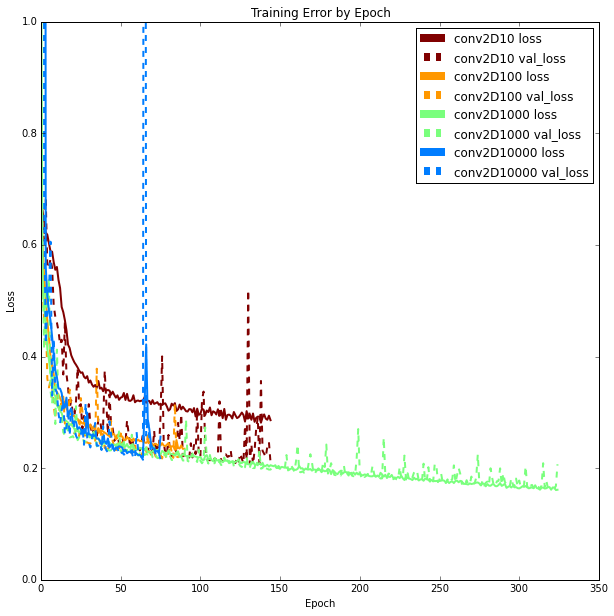

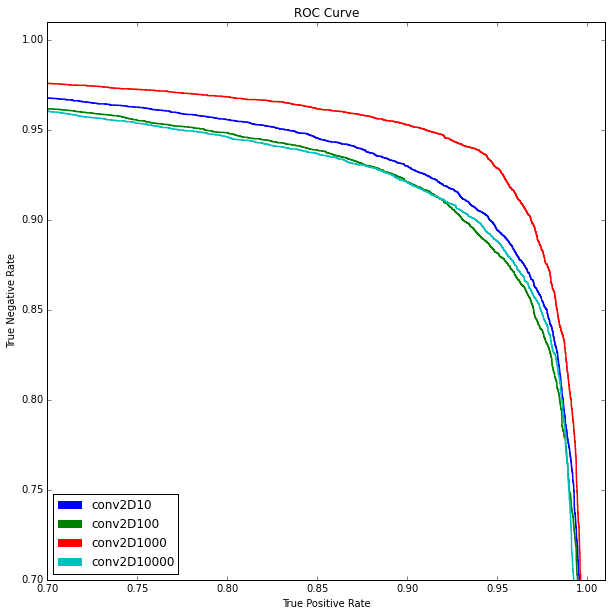

In [18]:
label_list = [k for k,v in sorted(predictions.iteritems()) if '2D1' in k]
my_draw_list(label_list, predictions, histories)

## Plot Early Stopping

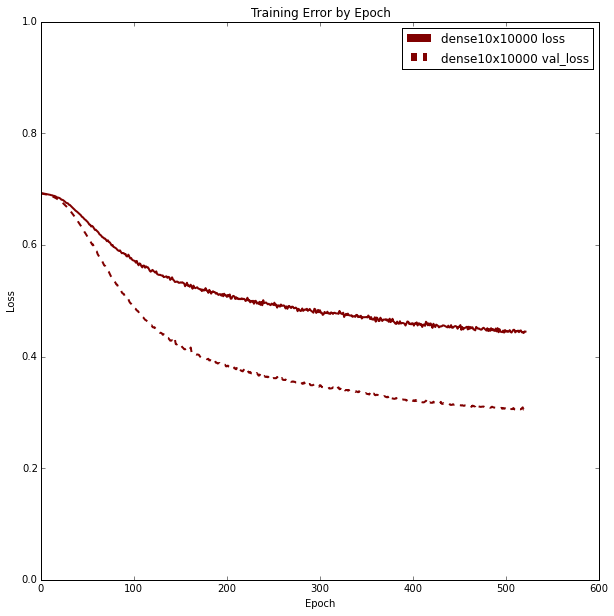

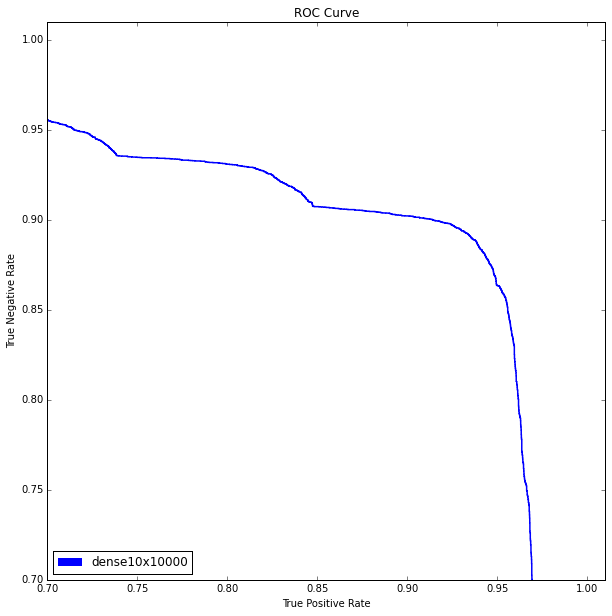

In [6]:
label_list = [k for k,v in sorted(predictions.iteritems()) if 'x10000' in k]
draw_list(label_list, predictions, histories)

## Plot Dense


In [ ]:
label_list = [k for k,v in sorted(predictions.iteritems()) if 'dense' in k and not 'long' in k]
draw_list(label_list, predictions, histories)

## Plot Branched and Large

TypeError: list indices must be integers, not str

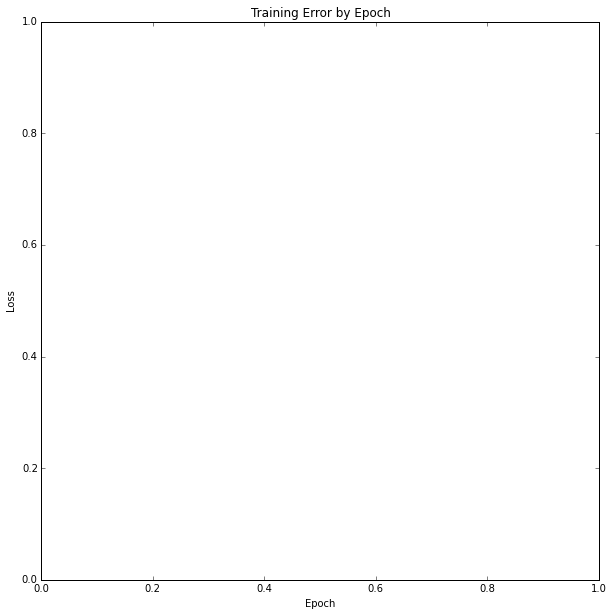

In [10]:
draw_list(['scnn', 'bcnn', 'conv10000', 'dense10000', 'dense100long'], predictions, histories)

In [ ]:
label_list = [k for k,v in sorted(predictions.iteritems()) if 'long' in k]